# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

In [3]:
# replace spaces in city names
cities = [i.replace(' ', '+') for i in cities]

for i in cities:
    print(i)

iqaluit
yarmouth
mataura
bethel
dikson
avarua
kaitangata
nikolskoye
kirakira
taolanaro
lorengau
hofn
punta+arenas
okha
busselton
cidreira
klaksvik
mecca
vardo
albany
illoqqortoormiut
marsh+harbour
bluff
astana
tuktoyaktuk
roma
kapaa
xuddur
pacific+grove
raga
port+elizabeth
kodiak
thanh+hoa
chokurdakh
mrirt
almaznyy
hermanus
tarudant
butaritari
ushuaia
atuona
yantal
azul
rikitea
ilulissat
acapulco
turtkul
sueyoshi
khonsa
tasiilaq
nerchinskiy+zavod
puerto+ayora
wichita
bathsheba
hasaki
christchurch
topeka
nemuro
jamestown
constitucion
barrow
indian+head
black+river
havre-saint-pierre
najran
santa+cruz+de+tenerife
kutum
hambantota
coahuayana
nuevitas
lagoa
vaini
portland
hobart
cape+town
ahipara
khash
nipawin
gunjur
sao+joao+da+barra
airai
saryshagan
porto+santo
saleaula
qaanaaq
upernavik
port+alfred
inongo
lahaina
saint-philippe
harper
saskylakh
lac+du+bonnet
bengkulu
hilo
pevek
lompoc
yumen
yellowknife
shalinskoye
kuzino
mahebourg
herat
ningbo
vostok
guerrero+negro
olinda
batagay
medina

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create empty list to store data
weather_data = []

#Set up query string
base_url = f'https://api.openweathermap.org/data/2.5/weather?'

#to keep count in print log
counter = 0

#loop through cities to call in query string, make sure errors are returned correctly
for city in cities:
    counter = counter + 1
    print(f'Making request number {counter} for current weather data in {city}.')
    
    try:
        url = f'{base_url}q={city}&appid={weather_api_key}'
        response = requests.get(url).json()
        weather_data.append(response)
        
    except:
        print(f'City not found. Skipping...')

Making request number 1 for current weather data in iqaluit.
Making request number 2 for current weather data in yarmouth.
Making request number 3 for current weather data in mataura.
Making request number 4 for current weather data in bethel.
Making request number 5 for current weather data in dikson.
Making request number 6 for current weather data in avarua.
Making request number 7 for current weather data in kaitangata.
Making request number 8 for current weather data in nikolskoye.
Making request number 9 for current weather data in kirakira.
Making request number 10 for current weather data in taolanaro.
Making request number 11 for current weather data in lorengau.
Making request number 12 for current weather data in hofn.
Making request number 13 for current weather data in punta+arenas.
Making request number 14 for current weather data in okha.
Making request number 15 for current weather data in busselton.
Making request number 16 for current weather data in cidreira.
Making 

Making request number 130 for current weather data in husavik.
Making request number 131 for current weather data in chicama.
Making request number 132 for current weather data in east+london.
Making request number 133 for current weather data in gisborne.
Making request number 134 for current weather data in athabasca.
Making request number 135 for current weather data in prince+rupert.
Making request number 136 for current weather data in tuatapere.
Making request number 137 for current weather data in bredasdorp.
Making request number 138 for current weather data in nome.
Making request number 139 for current weather data in waipawa.
Making request number 140 for current weather data in atambua.
Making request number 141 for current weather data in coquimbo.
Making request number 142 for current weather data in atkinson.
Making request number 143 for current weather data in pandavapura.
Making request number 144 for current weather data in half+moon+bay.
Making request number 145 fo

Making request number 257 for current weather data in san+javier.
Making request number 258 for current weather data in kavieng.
Making request number 259 for current weather data in severo-kurilsk.
Making request number 260 for current weather data in tiksi.
Making request number 261 for current weather data in saint-louis.
Making request number 262 for current weather data in kudahuvadhoo.
Making request number 263 for current weather data in novovarshavka.
Making request number 264 for current weather data in rexburg.
Making request number 265 for current weather data in namibe.
Making request number 266 for current weather data in salalah.
Making request number 267 for current weather data in mount+gambier.
Making request number 268 for current weather data in chaozhou.
Making request number 269 for current weather data in manokwari.
Making request number 270 for current weather data in araure.
Making request number 271 for current weather data in orsha.
Making request number 272 f

Making request number 385 for current weather data in belen.
Making request number 386 for current weather data in college.
Making request number 387 for current weather data in kattivakkam.
Making request number 388 for current weather data in ust-kamchatsk.
Making request number 389 for current weather data in florianopolis.
Making request number 390 for current weather data in tilichiki.
Making request number 391 for current weather data in san+patricio.
Making request number 392 for current weather data in holt.
Making request number 393 for current weather data in dar+es+salaam.
Making request number 394 for current weather data in lata.
Making request number 395 for current weather data in wulanhaote.
Making request number 396 for current weather data in damavand.
Making request number 397 for current weather data in payyannur.
Making request number 398 for current weather data in panama+city.
Making request number 399 for current weather data in umzimvubu.
Making request number 

Making request number 513 for current weather data in rtishchevo.
Making request number 514 for current weather data in missoula.
Making request number 515 for current weather data in port-gentil.
Making request number 516 for current weather data in olafsvik.
Making request number 517 for current weather data in wahran.
Making request number 518 for current weather data in kisangani.
Making request number 519 for current weather data in barahona.
Making request number 520 for current weather data in capreol.
Making request number 521 for current weather data in lianran.
Making request number 522 for current weather data in berlevag.
Making request number 523 for current weather data in champagnole.
Making request number 524 for current weather data in astanajapura.
Making request number 525 for current weather data in yarada.
Making request number 526 for current weather data in amalapuram.
Making request number 527 for current weather data in kingston.
Making request number 528 for c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create lists to store values
name_list = []
country_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []
cloud_list = []
humidity_list = []

# use counter to help create index 
line_tracker = 0

# function to convert kelvin to farenheit
def kelvin_to_f(k):
    return ((9.0/5.0) * (k-273) + 32)   # <- kelvin to farenheit formula


# walk through dataset
for line in weather_data:
    
    # check to see if data exists in specified location
        # if so, grab data 
        # add data to appropriate list

    if weather_data[line_tracker]['cod'] == 200:
        name = weather_data[line_tracker]['name']
        name_list.append(name)
        
    if weather_data[line_tracker]['cod'] == 200:
        country = weather_data[line_tracker]['sys']['country']
        country_list.append(country)  
        
    if weather_data[line_tracker]['cod'] == 200:
        lat = weather_data[line_tracker]['coord']['lat']
        lat_list.append(lat)
        
    if weather_data[line_tracker]['cod'] == 200:
        lng = weather_data[line_tracker]['coord']['lon']
        lng_list.append(lng)
        
    if weather_data[line_tracker]['cod'] == 200:
        wind = weather_data[line_tracker]['wind']['speed']
        wind_list.append(wind)
        
    if weather_data[line_tracker]['cod'] == 200:
        cloud = weather_data[line_tracker]['clouds']['all']
        cloud_list.append(cloud)
        
    if weather_data[line_tracker]['cod'] == 200:
        humidity = weather_data[line_tracker]['main']['humidity']
        humidity_list.append(humidity)  
        
    if weather_data[line_tracker]['cod'] == 200:
        temp = weather_data[line_tracker]['main']['temp_max']
        temp = kelvin_to_f(temp)
        temp_list.append(temp)  
        
    line_tracker += 1

In [6]:
weather_df = pd.DataFrame(list(zip(name_list, country_list, lat_list, lng_list, temp_list, wind_list, cloud_list, humidity_list)), 
                          columns = ['Name', 'Country', 'Latitude', 'Longitude','Temperature(F)', 'Wind Speed(mph)', 'Cloud Coverage', 'Humidity'])

weather_df

,Name,Country,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity
0,Iqaluit,CA,63.7506,-68.5145,5.270,1.03,75,72
1,Yarmouth,US,41.7057,-70.2286,38.264,5.66,1,64
2,Mataura,NZ,-46.1927,168.8643,50.270,1.34,62,89
3,Bethel,US,41.3712,-73.4140,34.268,5.14,1,32
4,Dikson,RU,73.5069,80.5464,-26.392,1.82,99,87
...,...,...,...,...,...,...,...,...
534,Lima,PE,-12.0432,-77.0282,80.870,2.57,0,65
535,Tevaitoa,PF,-16.7833,-151.5000,82.796,9.57,100,75
536,Dali,CN,25.7000,100.1833,48.236,2.18,0,68
537,Asău,RO,46.4333,26.4000,45.266,5.66,40,39


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df['Humidity'] > 100]

,Name,Country,Latitude,Longitude,Temperature(F),Wind Speed(mph),Cloud Coverage,Humidity


In [ ]:
#No cities are above 100% humidity. Skip this section


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

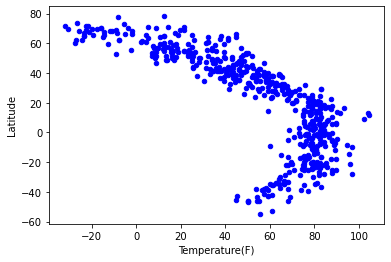

In [9]:
temp_plt = weather_df.plot.scatter(x='Temperature(F)',
                      y='Latitude',
                      c='blue')

plt.savefig('lat_v_temp.png')

In [ ]:
#analyzing temp of each city according to lattitude

## Latitude vs. Humidity Plot

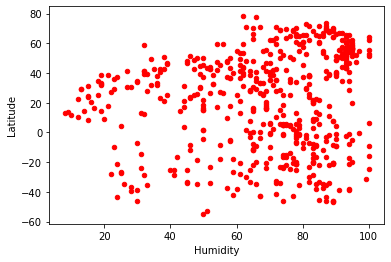

In [10]:
humidity_plt = weather_df.plot.scatter(x='Humidity',
                      y='Latitude',
                      c='Red')
plt.savefig('lat_v_humidity.png')

In [ ]:
#analyzing humidity of each city according to lattitude

## Latitude vs. Cloudiness Plot

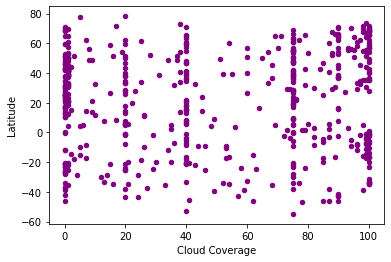

In [11]:
cloud_plt = weather_df.plot.scatter(x='Cloud Coverage',
                      y='Latitude',
                      c='Purple')
plt.savefig('lat_v_cloud.png')

In [ ]:
# analyzing cloud coverage of each city according to lattitude

## Latitude vs. Wind Speed Plot

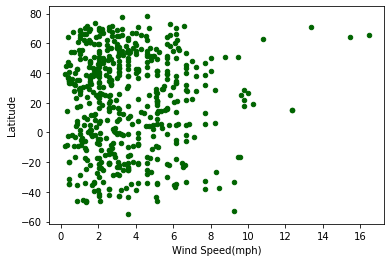

In [12]:
wind_plt = weather_df.plot.scatter(x='Wind Speed(mph)',
                      y='Latitude',
                      c='DarkGreen')
plt.savefig('lat_v_wind.png')

In [ ]:
# analyzing cloud coverage of each city according to lattitude

## Linear Regression

In [14]:
# create new dataframes from weather_df for northern and southern hemispheres
southern_hemi_df = weather_df.loc[(weather_df['Latitude']) <= 0]
northern_hemi_df = weather_df.loc[(weather_df['Latitude']) >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

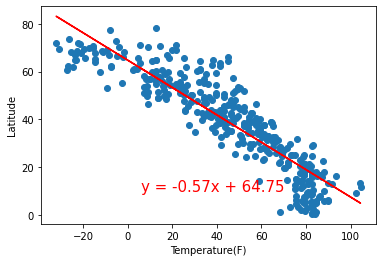

<Figure size 432x288 with 0 Axes>

In [15]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Temperature(F)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_temp_regression.png')

In [ ]:
#Temperatures rise as you approach the equator but huver around 80 degrees the close you get

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

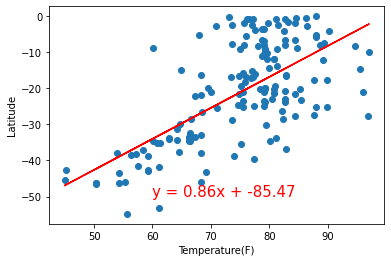

<Figure size 432x288 with 0 Axes>

In [16]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Temperature(F)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-50),fontsize=15,color="red")
plt.xlabel('Temperature(F)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_temp_regression.png')

In [ ]:
#Temps are more spread out but mostly rise as you aproach the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

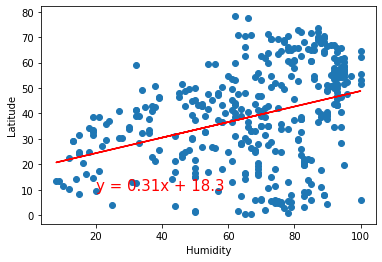

<Figure size 432x288 with 0 Axes>

In [17]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_humidity_regression.png')

In [ ]:
#Humidity, while varied along the latitudes, seems to rise the farther from the equator you go. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

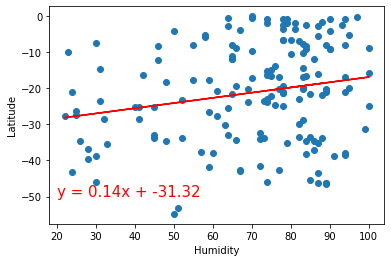

<Figure size 432x288 with 0 Axes>

In [18]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_humidity_regression.png')

In [ ]:
# Humidity ranges widely in the sounthern hemisphear with a general trend of rising near the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

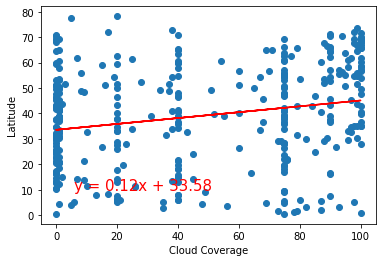

<Figure size 432x288 with 0 Axes>

In [19]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Cloud Coverage']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_cloud_regression.png')

In [ ]:
# Cloud coverage seems to have nothing to do with lattitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

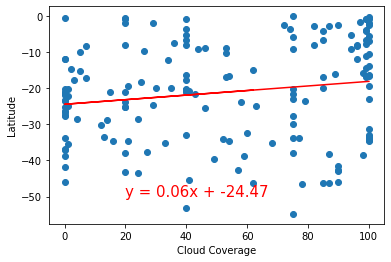

<Figure size 432x288 with 0 Axes>

In [20]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Cloud Coverage']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Cloud Coverage')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_cloud_regression.png')

In [ ]:
# Cloud coverage seems to have nothing to do with lattitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

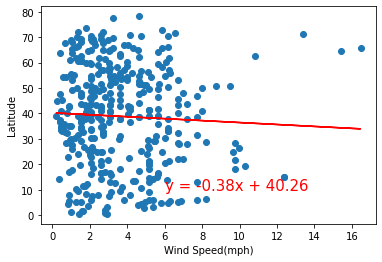

<Figure size 432x288 with 0 Axes>

In [21]:
# Add the linear regression equation and line to plot
x_values = northern_hemi_df['Wind Speed(mph)']
y_values = northern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('n_wind_regression.png')

In [ ]:
#Wind also seems to have little to do with latitude though some outliers suggest the farther from the equator the windier it seems

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

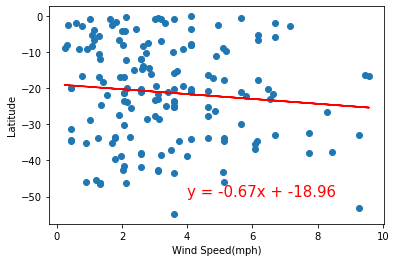

<Figure size 432x288 with 0 Axes>

In [22]:
# Add the linear regression equation and line to plot
x_values = southern_hemi_df['Wind Speed(mph)']
y_values = southern_hemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-50),fontsize=15,color="red")
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')
plt.show()

plt.savefig('s_wind_regression.png')

In [ ]:
#wind speed also seems to have little in common with latitude